In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read Topt data
path = '/Users/hzc/data/MoreAnalysis_2024/VPD_202409/output/'

Topt_filename = '/Users/hzc/data/LP/Topt_0709_FLUX_check.csv'
Topt          = pd.read_csv(Topt_filename, index_col = 0)

> #### <b>Observation of VPD</b>
here we use midday VPD (11AM-2PM)

In [4]:
# read vpd data
vpd_Topt_name  = path + 'Topt_VPDmidday_q50.csv'
vpd_Thigh_name = path + 'higherT_VPDmidday_q50_dT5.csv'

vpd_Topt  = pd.read_csv(vpd_Topt_name, index_col = 0)
vpd_Thigh = pd.read_csv(vpd_Thigh_name, index_col = 0)

(-25.0, 200.0)

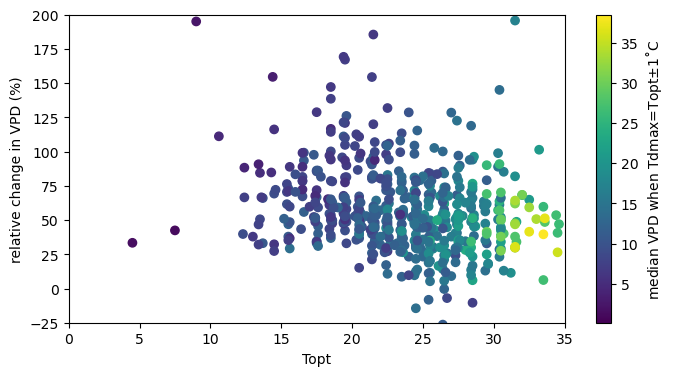

In [5]:
# compute relative change in VPD between higher T (here T ranges from Topt+3 to Topt+5) and Topt (T=Topt+/-1)
deltaVPD = vpd_Thigh - vpd_Topt
relVPD_siteyr = deltaVPD / vpd_Topt

# plot every single site-yr observation
x     = np.array(Topt).flatten()
y     = np.array(relVPD_siteyr).flatten()
c     = np.array(vpd_Topt).flatten()
valid = (x==x) & (y==y)

fig, ax = plt.subplots(figsize=(8,4))
p = ax.scatter(x[valid], y[valid]*100, c=c[valid])
fig.colorbar(p, label=r'median VPD when Tdmax=Topt$\pm$1˚C')
ax.set_xlabel('Topt')
ax.set_ylabel('relative change in VPD (%)')

# remove to view the outliers
ax.set_xlim(0,35)
ax.set_ylim(-25,200)

In [6]:
# print # of valid site yr:
print("# of observations: ", np.nansum(valid))

# of observations:  567


Text(0, 0.5, 'relative change in VPD (%)')

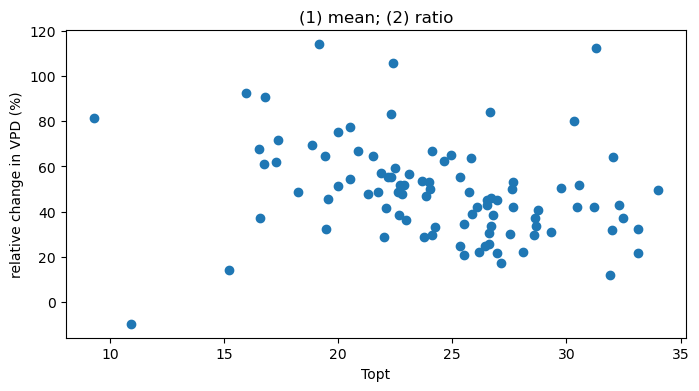

In [ ]:
# multi-annual analysis

Topt_mean        = Topt.mean(axis=1)
vpd_Thigh_mean   = vpd_Thigh.mean(axis=1)
vpd_Topt_mean    = vpd_Topt.mean(axis=1)
# relVPD_site: compute mean value first and then the ratio
relVPD_site      = (vpd_Thigh_mean - vpd_Topt_mean) / vpd_Topt_mean
# relVPD_mean: compute the mean of relative VPD of each single yr
relVPD_site_mean = relVPD_siteyr.mean(axis=1)

fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(Topt_mean, relVPD_site*100)
ax.set_title('(1) mean; (2) ratio')
ax.set_xlabel('Topt')
ax.set_ylabel('relative change in VPD (%)')

(10.0, 125.0)

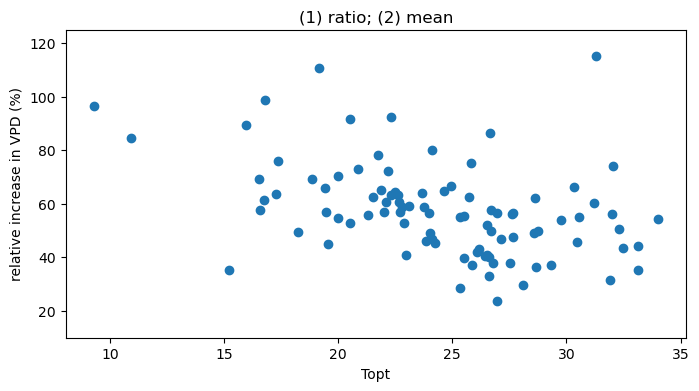

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(Topt_mean, relVPD_site_mean*100)
ax.set_title('(1) ratio; (2) mean')
ax.set_xlabel('Topt')
ax.set_ylabel('relative increase in VPD (%)')

ax.set_ylim(10,125)

> #### <b>Observation of light availability</b>
Here we use growing season-averaged photosynthetic photon flux density

In [11]:
# read Iabs data
# photosynthetic photon flux density (µmol m-2 s-1)
Iabs_mean_filename = '/Users/hzc/data/MoreAnalysis_2024/Iabs_202409/output/Iabs_mean_gs_30Sep24.csv'
Iabs_mean_siteyr   = pd.read_csv(Iabs_mean_filename, index_col = 0)

# multi-year average
Iabs_mean = Iabs_mean_siteyr.mean(axis=1)

Text(0, 0.5, 'growing season PPFD')

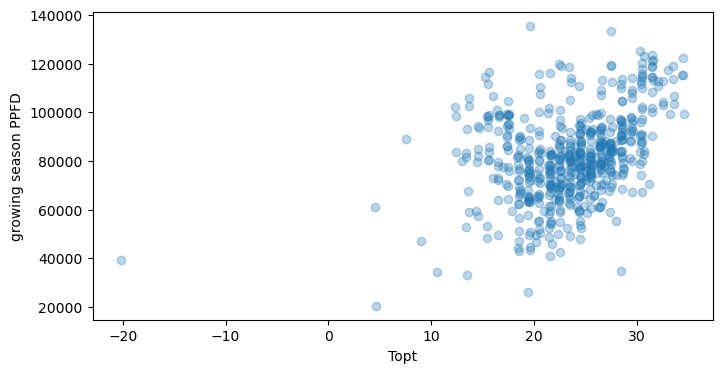

In [13]:
# plot every single site-yr observation
x     = np.array(Topt).flatten()
y2    = np.array(Iabs_mean_siteyr).flatten()
valid2 = (x==x) & (y==y2)

fig, ax = plt.subplots(figsize=(8,4))
p = ax.scatter(x[valid], y2[valid]*100, alpha=.3)
ax.set_xlabel('Topt')
ax.set_ylabel('growing season PPFD')


Text(0, 0.5, 'Iabs')

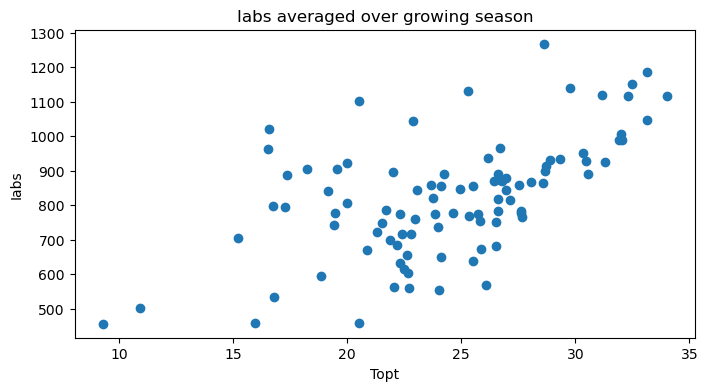

In [ ]:
# similar relation also holds for accumulated Iabs
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(Topt_mean, Iabs_mean)
ax.set_title('Iabs averaged over growing season')
ax.set_xlabel('Topt')
ax.set_ylabel('Iabs')

> ##### <b>Plot 2 figures together for Section 3.3</b>

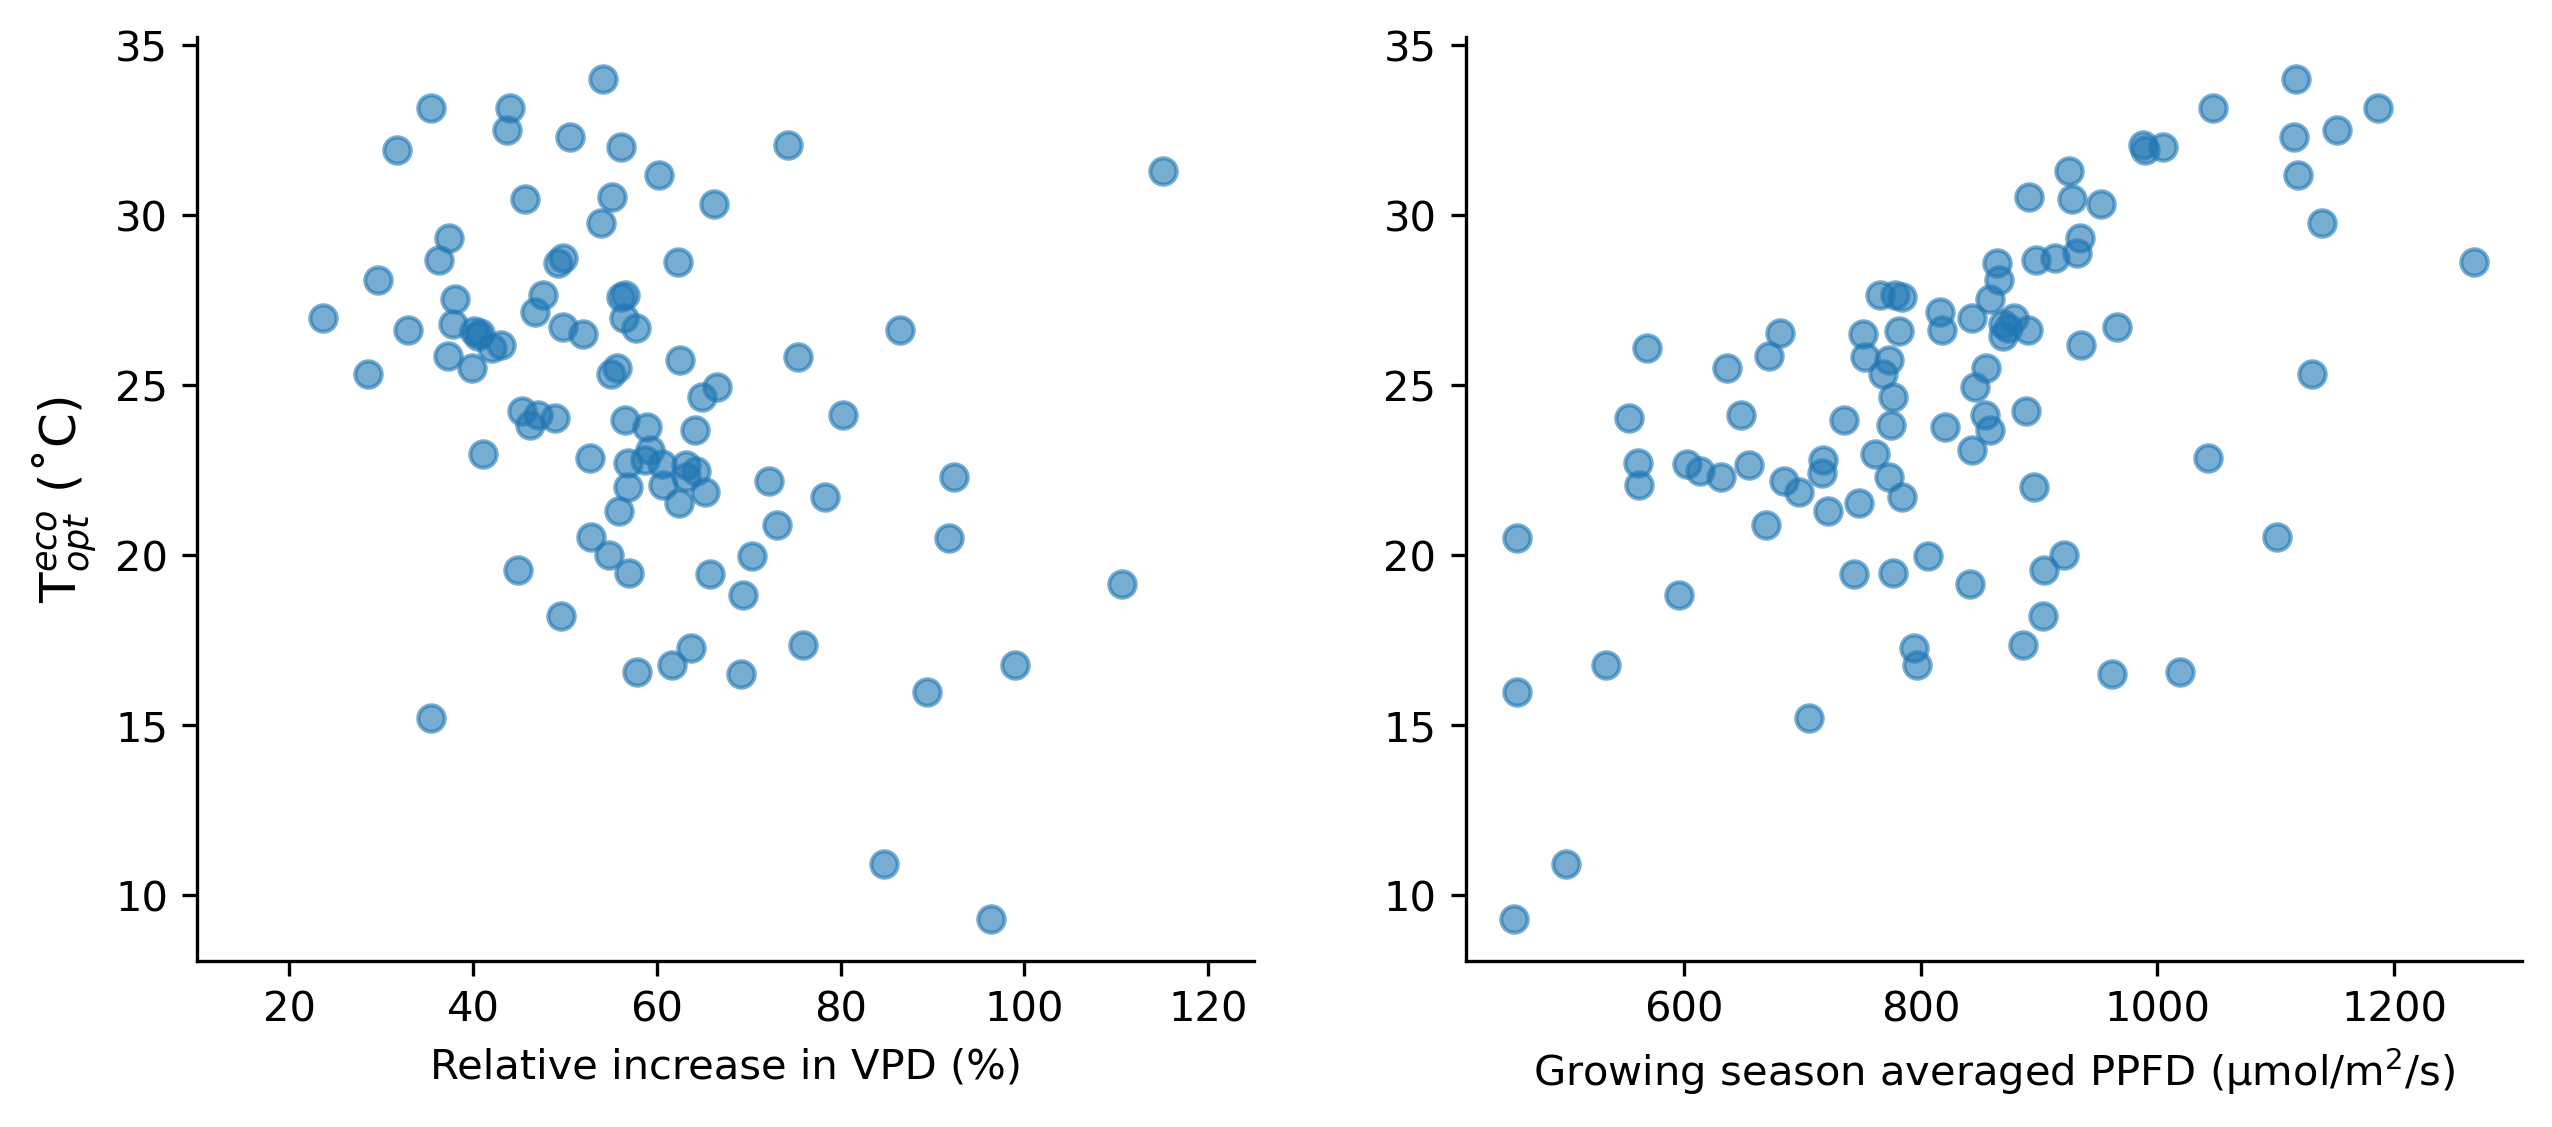

In [38]:
fig31, ax = plt.subplots(1,2,
                       figsize=(10,4),
                       dpi=300)

ax[0].scatter(relVPD_site_mean*100, Topt_mean, s=40, alpha=.6)
ax[1].scatter(Iabs_mean, Topt_mean, s=40, alpha=.6)

# xlim
ax[0].set_xlim(10,125)

# label
ax[0].set_ylabel("T$_{opt}^{eco}$ (˚C)", fontsize=12)
ax[0].set_xlabel("Relative increase in VPD (%)")
ax[1].set_xlabel("Growing season averaged PPFD (µmol/m$^2$/s)")

# cancel spines
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)